 - I - La categorie 'content_char_length_category'
- II - Categorical features.
- III - Continuous features.
- IV - 

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly as ply
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.express as px

sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_csv('/Users/lucas/Desktop/Polytech/IG4/S7/projet_DS/mail_clean.csv')

In [3]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'DayWeek', 'Message-ID', 'Date', 'From',
       'To', 'Subject', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder',
       'X-Origin', 'X-FileName', 'content', 'user', 'Cat_1_level_1',
       'Cat_1_level_2', 'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2',
       'Cat_2_weight', 'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight',
       'Cat_4_level_1', 'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1',
       'Cat_5_level_2', 'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2',
       'Cat_6_weight', 'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight',
       'Cat_8_level_1', 'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1',
       'Cat_9_level_2', 'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight', 'labeled', 'Years', 'Month', 'Day', 'Hours',
       'content_char_len', 'content_char_length_category', 'content_word_len',
       'content_word_length_category', 'To_count'],
      dtype='object')


Unnamed: 0  Unnamed: 0.1  DayWeek  \
0           0             0        0   
1           1             1        4   
2           2             2        2   
3           3             3        0   
4           4             4        3   

                                      Message-ID                 Date  \
0  <18782981.1075855378110.JavaMail.evans@thyme>  2001-05-14 23:39:00   
1  <15464986.1075855378456.JavaMail.evans@thyme>  2001-05-04 20:51:00   
2  <24216240.1075855687451.JavaMail.evans@thyme>  2000-10-18 10:00:00   
3  <13505866.1075863688222.JavaMail.evans@thyme>  2000-10-23 13:13:00   
4  <30922949.1075863688243.JavaMail.evans@thyme>  2000-08-31 12:07:00   

                                     From                           To  \
0  frozenset({'phillip.allen@enron.com'})     ['tim.belden@enron.com']   
1  frozenset({'phillip.allen@enron.com'})  ['john.lavorato@enron.com']   
2  frozenset({'phillip.allen@enron.com'})   ['leah.arsdall@enron.com']   
3  frozenset({'phillip.allen@enron.com'})    ['randall.gay@enron.com']   
4  frozenset({'phillip.allen@enron.com'})     ['greg.piper@enron.com']   

      Subject           X-From  \
0  No subject  Phillip K Allen   
1         Re:  Phillip K Allen   
2    Re: test  Phillip K Allen   
3  No subject  Phillip K Allen   
4   Re: Hello  Phillip K Allen   

                                                X-To  ... labeled Years Month  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>  ...   False  2001     5   
1  John J Lavorato <John J Lavorato/ENRON@enronXg...  ...   False  2001     5   
2                                   Leah Van Arsdall  ...   False  2000    10   
3                                      Randall L Gay  ...   False  2000    10   
4                                         Greg Piper  ...   False  2000     8   

  Day Hours content_char_len content_char_length_category  content_word_len  \
0  14    23               20                            1                 4   
1   4    20              773                            2               138   
2  18    10               29                            1                 5   
3  23    13              180                            1                34   
4  31    12               33                            1                 4   

   content_word_length_category  To_count  
0                             1         1  
1                             2         1  
2                             1         1  
3                             1         1  
4                             1         1  

[5 rows x 57 columns]

In [4]:
df.describe()

Unnamed: 0   Unnamed: 0.1        DayWeek  Cat_1_level_1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    49999.500000   49999.500000       2.096180      -0.995800   
std     28867.657797   28867.657797       1.532669       0.091556   
min         0.000000       0.000000       0.000000      -1.000000   
25%     24999.750000   24999.750000       1.000000      -1.000000   
50%     49999.500000   49999.500000       2.000000      -1.000000   
75%     74999.250000   74999.250000       3.000000      -1.000000   
max     99999.000000   99999.000000       6.000000       1.000000   

       Cat_1_level_2   Cat_1_weight  Cat_2_level_1  Cat_2_level_2  \
count   100000.00000  100000.000000   100000.00000   100000.00000   
mean        -0.99373      -0.994360       -0.99370       -0.98934   
std          0.15707       0.124773        0.14332        0.29204   
min         -1.00000      -1.000000       -1.00000       -1.00000   
25%         -1.00000      -1.000000       -1.00000       -1.00000   
50%         -1.00000      -1.000000       -1.00000       -1.00000   
75%         -1.00000      -1.000000       -1.00000       -1.00000   
max          8.00000       2.000000        4.00000       13.00000   

        Cat_2_weight  Cat_3_level_1  ...  Cat_10_weight          Years  \
count  100000.000000   100000.00000  ...  100000.000000  100000.000000   
mean       -0.994780       -0.99404  ...      -0.999980    2000.615800   
std         0.118713        0.14834  ...       0.006325       0.827972   
min        -1.000000       -1.00000  ...      -1.000000    1980.000000   
25%        -1.000000       -1.00000  ...      -1.000000    2000.000000   
50%        -1.000000       -1.00000  ...      -1.000000    2001.000000   
75%        -1.000000       -1.00000  ...      -1.000000    2001.000000   
max         3.000000        4.00000  ...       1.000000    2020.000000   

               Month            Day          Hours  content_char_len  \
count  100000.000000  100000.000000  100000.000000     100000.000000   
mean        7.231930      16.140620      13.947990       2158.971240   
std         3.623966       8.705156       5.107395       7370.232522   
min         1.000000       1.000000       0.000000          1.000000   
25%         4.000000       9.000000      11.000000        272.000000   
50%         8.000000      16.000000      14.000000        758.000000   
75%        10.000000      24.000000      17.000000       1854.000000   
max        12.000000      31.000000      23.000000     260461.000000   

       content_char_length_category  content_word_len  \
count                 100000.000000     100000.000000   
mean                       2.000790        296.217970   
std                        0.706608       1034.192824   
min                        1.000000          0.000000   
25%                        2.000000         38.000000   
50%                        2.000000        105.000000   
75%                        3.000000        253.000000   
max                        3.000000      38084.000000   

       content_word_length_category       To_count  
count                 100000.000000  100000.000000  
mean                       2.004390       7.250530  
std                        0.704781      24.734084  
min                        1.000000       0.000000  
25%                        2.000000       1.000000  
50%                        2.000000       1.000000  
75%                        3.000000       2.000000  
max                        3.000000     881.000000  

[8 rows x 42 columns]

- Categorical features: 
    - <b>Years</b>
    - <b>Month</b>
    - <b>DayWeek</b>
    - <b>Hours</b>
    - <b>From</b>
    - <b>To</b>
    - tous les <b>Cat_i_level_i</b>
    - <b>content_char_length_category</b>
    - <b>content_word_length_category</b>
    
    
    
- Continous features:
    - <b>To_count</b>
    - <b>content_char_len</b>
    - <b>content_word_len</b>
    
    
- Others:
    - <b>content</b>

<br>
<h3>I - La categorie <b>'content_char_length_category'</b>, la classe qui nous intéresse.</h3>

Rappelons la distribution du de la longueur du contenu avec sa variable categorique et sa variable continue

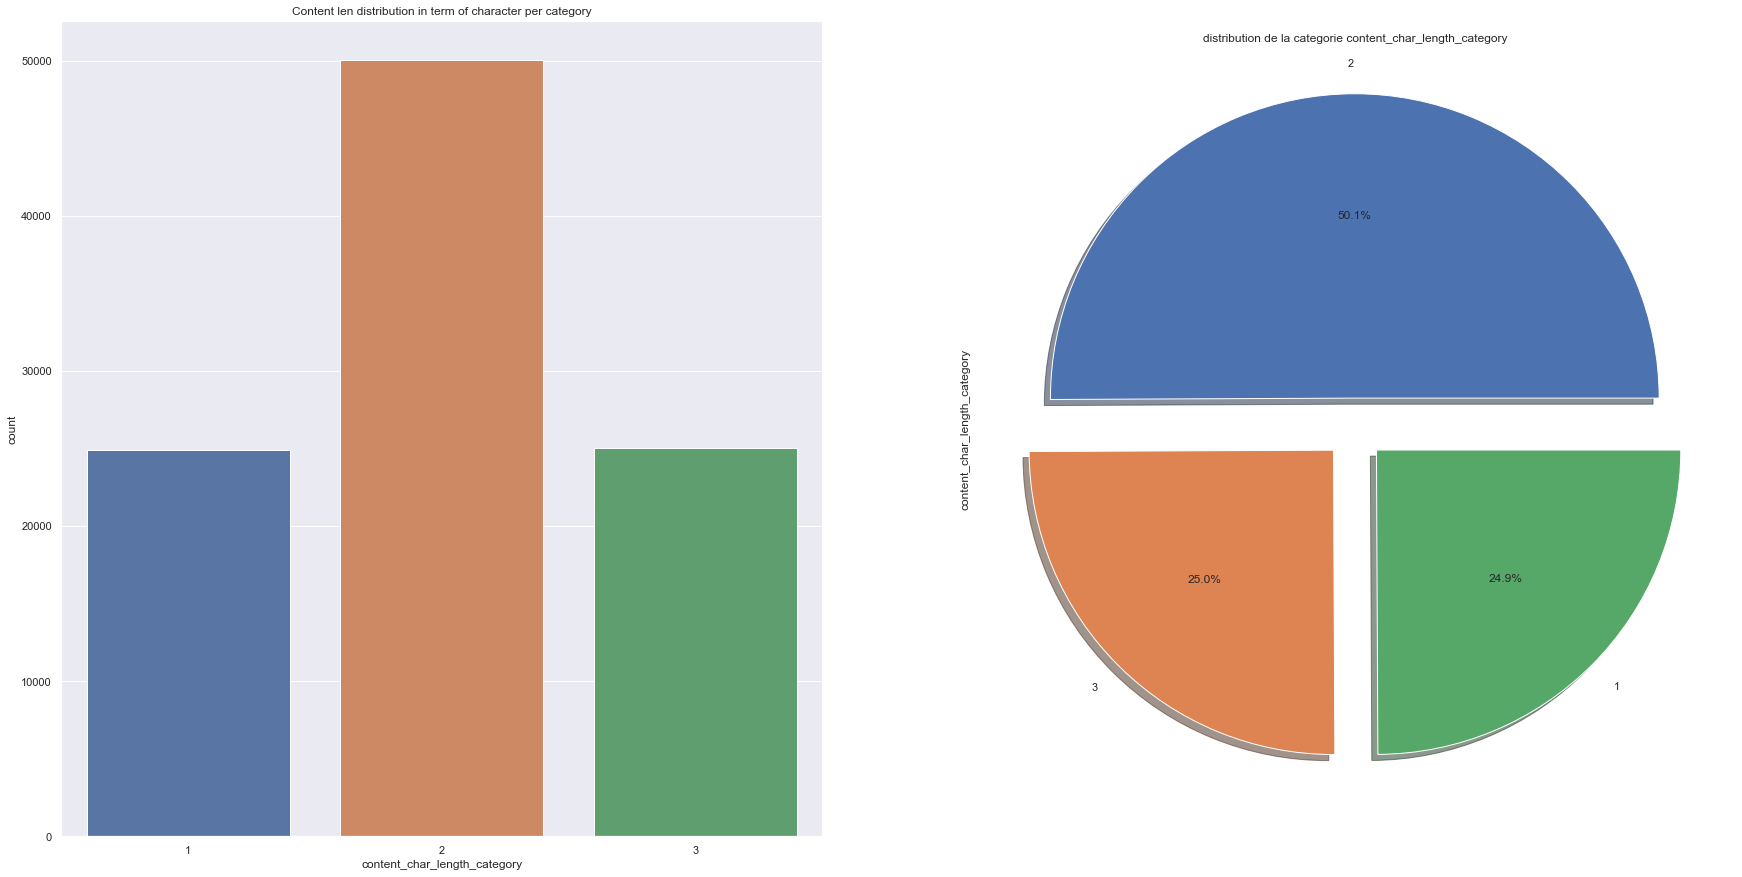

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(30,15))
content_char_len = df['content_char_len'].values

sns.countplot(x='content_char_length_category', data=df, ax=ax1)
ax1.set_title('Content len distribution in term of character per category')

df['content_char_length_category'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax2,shadow=True)
ax2.set_title('distribution de la categorie content_char_length_category')
plt.show()

<br>
<h4>a - La temporalité </h4>

<br>

- En fonction de <b>DayWeek</b>

In [10]:
fig = px.histogram(df, x="DayWeek", color="content_char_length_category", barmode='group')
fig.show()

<br>

- En fonction de la temporalité <b>Hours</b>

In [11]:
fig = px.histogram(df, x="Hours", color="content_char_length_category", barmode='group')
fig.show()

<br>

- En fonction de la temporalité <b>Day</b>

In [13]:
fig = px.histogram(df, x="Day", color="content_char_length_category", barmode='group')
fig.show()

<br>

- En fonction de <b>Month</b>

In [14]:
fig = px.histogram(df, x="Month", color="content_char_length_category", barmode='group')
fig.show()

<br>

- En fonction de <b>Year</b>

In [15]:
fig = px.histogram(df, x="Years", color="content_char_length_category", barmode='group')
fig.show()

<b> b - From </b>

Parmi ceux qui envoie le plus de mail, quelle est la distribution de la longueur des mails pour chaque personne?

In [31]:
user = df.From.unique()
counter_user = []

for i in user:
    counter = 0
    for j in df['From']:
        if  i == j:
            counter += 1
    counter_user.append(counter)
    

user_sorted = sorted(list(zip(counter_user, user)), reverse = True)[0:10]

nb_mail, user = zip(*user_sorted)

In [32]:
fig = px.bar(x=list(nb_mail), y=list(user), orientation='h')
fig.show()

In [44]:
count = [1 for i in range(0,len(df.From))]


data_user_cat = df[['From', 'content_char_length_category']]
data_user_cat['count'] = count

sum_by_cat = data_user_cat.groupby(['From','content_char_length_category']).sum().reset_index()

/opt/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
for index, row in sum_by_cat.iterrows():
    if row['From'] not in user:

        sum_by_cat.drop(index, inplace=True)
        
#On convertit au format string sinon express interpretera comme valeur continue.
sum_by_cat['content_char_length_category'] = sum_by_cat['content_char_length_category'].astype(str)

In [46]:
fig = px.bar(sum_by_cat, x='count', y='From', color='content_char_length_category', barmode='group' )
fig.show()